In [1]:
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from PIL import Image
import tensorflow as tf
from tensorflow import keras

import pandas as pd

In [2]:
csv_path = "./starter2.csv"
!head $csv_path -n3

is this man a professional baseball player,yes,COCO_train2014_000000458752.jpg
is the dog waiting,yes,COCO_train2014_000000524291.jpg
is the sky blue,yes,COCO_train2014_000000393221.jpg


### Preview data

['COCO_train2014_000000000009.jpg', 'COCO_train2014_000000000025.jpg', 'COCO_train2014_000000000030.jpg', 'COCO_train2014_000000000034.jpg', 'COCO_train2014_000000000036.jpg']
(15, question     could this photo be from a zoo
answer                                  yes
image       COCO_train2014_000000000025.jpg
Name: 15, dtype: object)


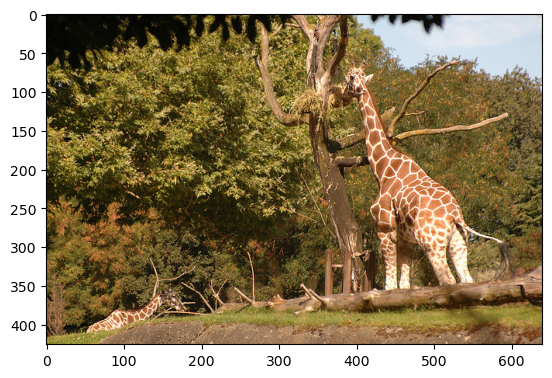

(18, question      are there flowers in the vase
answer                                  yes
image       COCO_train2014_000000000030.jpg
Name: 18, dtype: object)


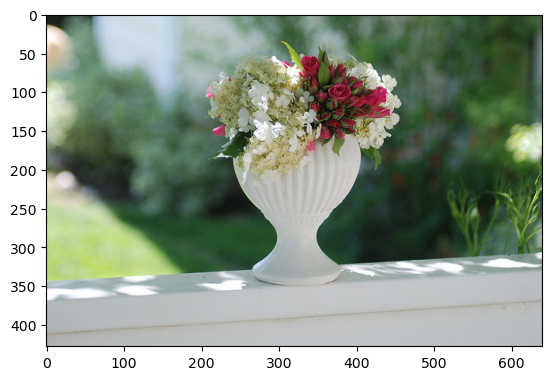

(21, question                    is this a horse
answer                                   no
image       COCO_train2014_000000000034.jpg
Name: 21, dtype: object)


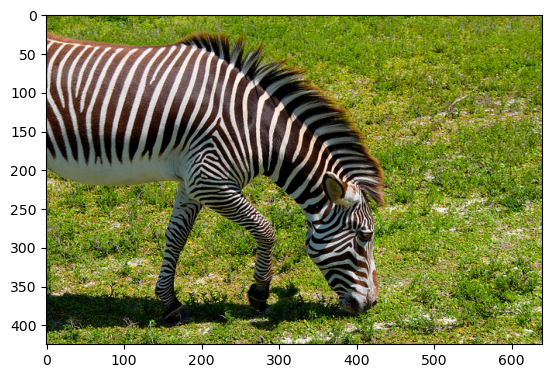

(121, question      is she wearing a bathing suit
answer                                  yes
image       COCO_train2014_000000000036.jpg
Name: 121, dtype: object)


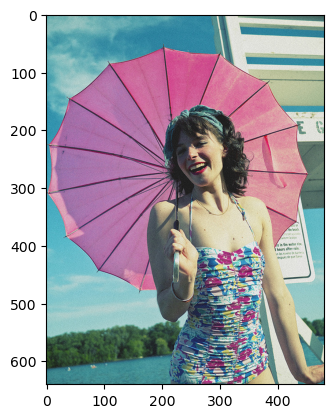

In [17]:
image_samples = os.listdir('./train2014/')[:5]
print(image_samples)
df = pd.read_csv(csv_path, names=['question','answer','image'])
for image in image_samples:
    for row in df.iterrows():
        if image == row[1]['image']:
            print(row)
            img = mpimg.imread('./train2014/' + image)
            imgplot = plt.imshow(img)
            plt.show()
    

### Verify all images can be located

In [18]:
import csv
with open('starter2.csv') as myfile:
   reader = csv.reader(myfile, delimiter=',')
   for row in reader:
      question, answer, image = row
      image = image.strip()
      assert os.path.exists(os.path.join('./train2014/', image))

### Resize the images to 299 x 299

In [20]:
os.makedirs("./thumbnails")
for r in df.iterrows():
    image = r[1]['image'].strip()
    size = 299, 299
    img = Image.open('./train2014/' + image)
    img.thumbnail(size)
    out_file = os.path.join('./thumbnails/', image)
    img.save(out_file, "JPEG")

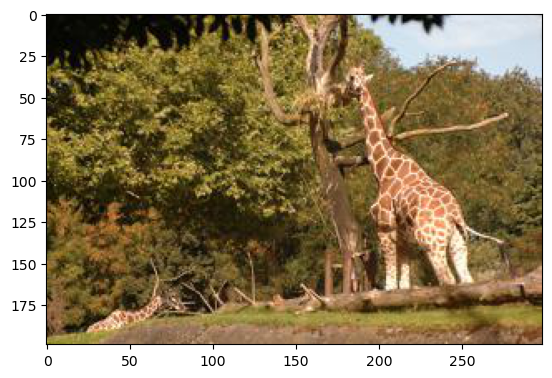

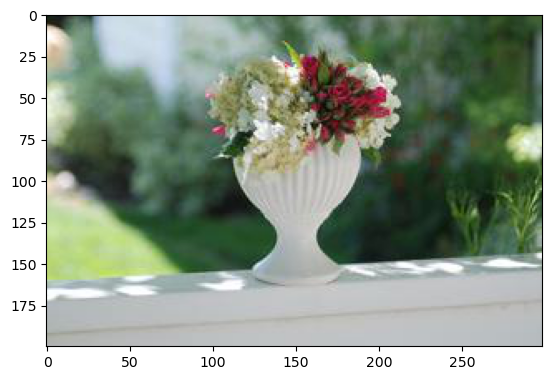

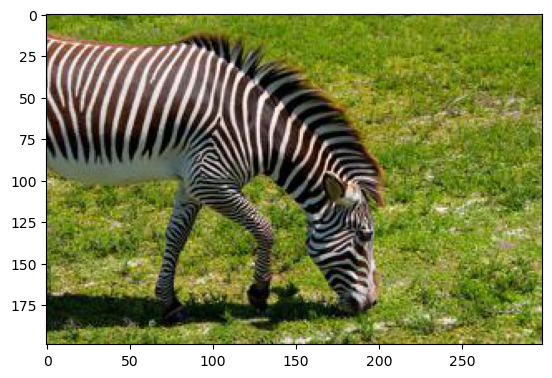

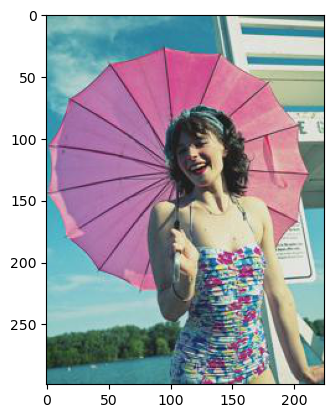

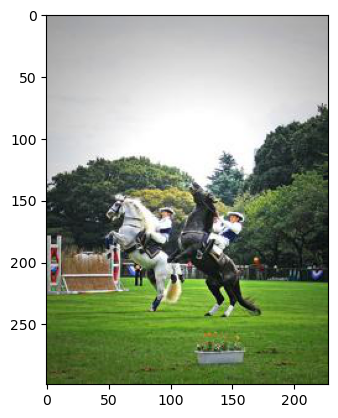

In [21]:
thumbnails_samples = os.listdir('./thumbnails/')[:5]
for image in thumbnails_samples:
    img = mpimg.imread('./thumbnails/' + image)
    imgplot = plt.imshow(img)
    plt.show()

In [22]:
with open('starter2.csv') as myfile:
   reader = csv.reader(myfile, delimiter=',')
   for row in reader:
      question, answer, image = row
      image = image.strip()
      assert os.path.exists(os.path.join('./thumbnails/', image))

In [23]:
import shutil

shutil.make_archive('thumbnails', 'zip', './thumbnails/')
!du -sh thumbnails.zip

256M	thumbnails.zip
